In [2]:
from RedditAnalyses.redditpipeline import *

In [2]:
# API credentials
client_id     = "**************"
client_secret = "**************"
password      = "**************"
username      = "**************"
user_agent    = "**************" 
topic         = ['datascience', 'machinelearning', 'physics', 'astrology', 'conspiracy']
num_chars_min = 100
limit_posts   = 1000
reddit        = RedditAnalyses(client_id, client_secret, password, username, user_agent, num_chars_min, topic)

In [4]:
# Load
classification = reddit.load_from_reddit()

Operation perfomed successfully


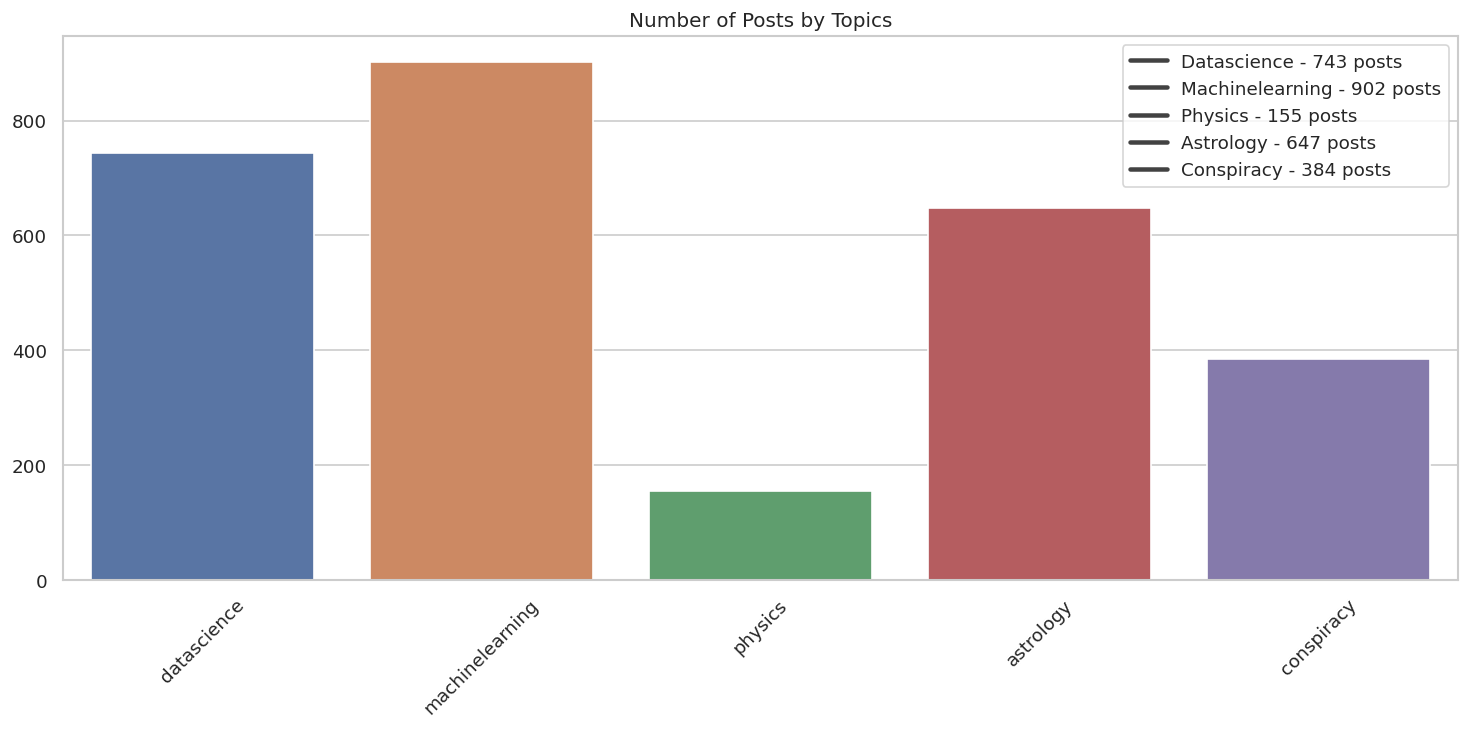

In [5]:
# View
reddit.plot_distribution()

In [6]:
# Split the data into training and testing
TEST_SIZE                        = .2 
X_train, X_test, y_train, y_test = reddit.split_data(TEST_SIZE)

In [7]:
# Preprocessing NLP
MIN_DOC_FREQ = 1
N_COMPONENTS = 1000
N_ITER       = 30
reddit.pipeline_NLP(MIN_DOC_FREQ, N_COMPONENTS, N_ITER)

Operation perfomed successfully


In [8]:
# Create Models
N_NEIGHBORS = 4
CV          = 3
reddit.create_models(N_NEIGHBORS, CV)

Operation perfomed successfully


In [9]:
# Train and evaluate
reddit.train_evaluate(X_train, X_test, y_train, y_test)

/home/pedrodev/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/pedrodev/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Classiication Report
               precision    recall  f1-score   support

           0       0.77      0.81      0.79       159
           1       0.77      0.84      0.80       181
           2       1.00      0.68      0.81        28
           3       0.84      0.95      0.89       128
           4       0.88      0.49      0.63        71

    accuracy                           0.80       567
   macro avg       0.85      0.75      0.78       567
weighted avg       0.81      0.80      0.80       567



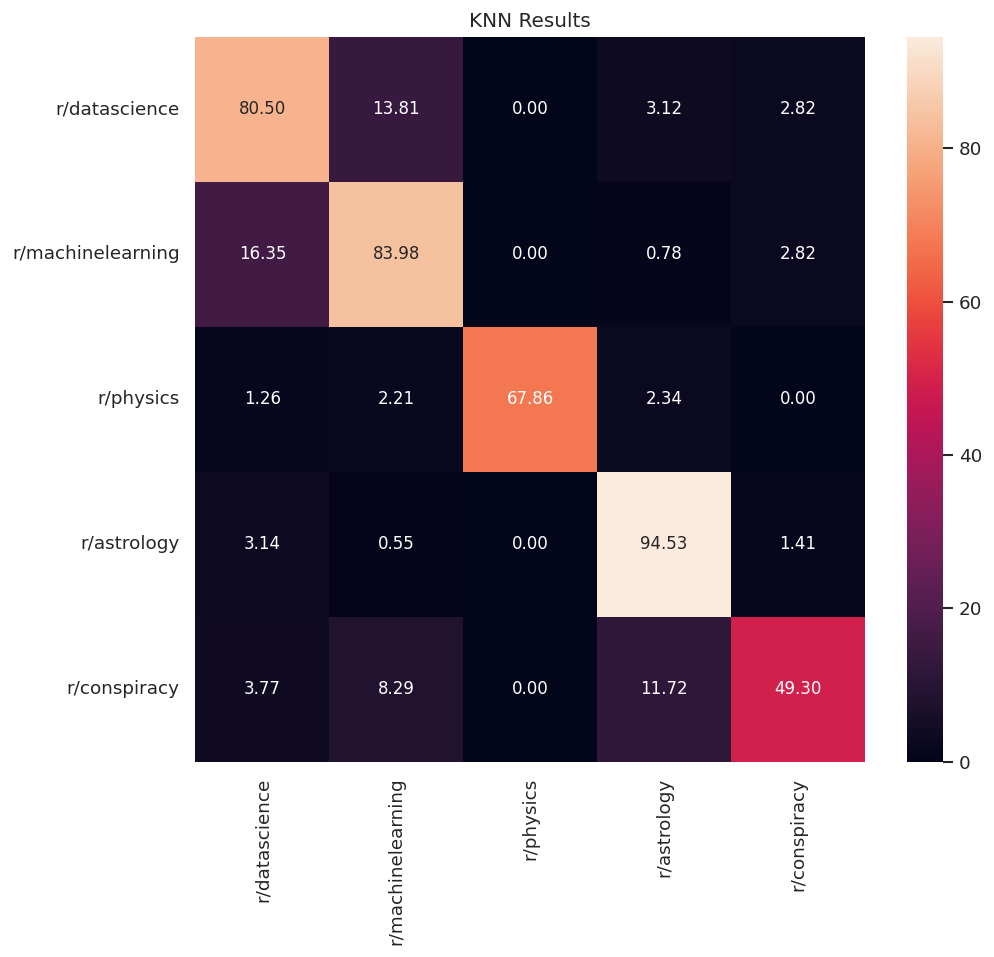

Classiication Report
               precision    recall  f1-score   support

           0       0.89      0.69      0.77       159
           1       0.71      0.92      0.80       181
           2       1.00      0.68      0.81        28
           3       0.89      0.95      0.92       128
           4       0.92      0.69      0.79        71

    accuracy                           0.82       567
   macro avg       0.88      0.78      0.82       567
weighted avg       0.84      0.82      0.82       567



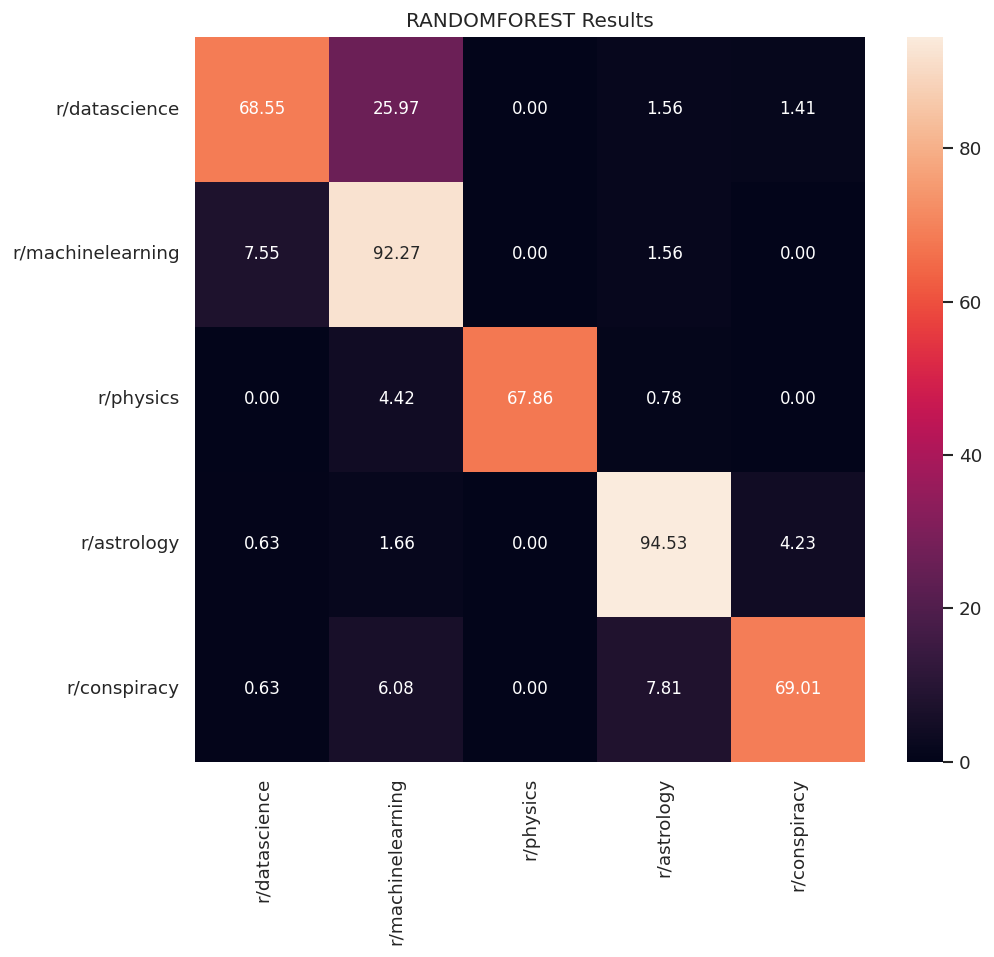

Classiication Report
               precision    recall  f1-score   support

           0       0.90      0.79      0.84       159
           1       0.79      0.94      0.86       181
           2       1.00      0.68      0.81        28
           3       0.94      0.95      0.94       128
           4       0.94      0.83      0.88        71

    accuracy                           0.87       567
   macro avg       0.91      0.84      0.87       567
weighted avg       0.88      0.87      0.87       567



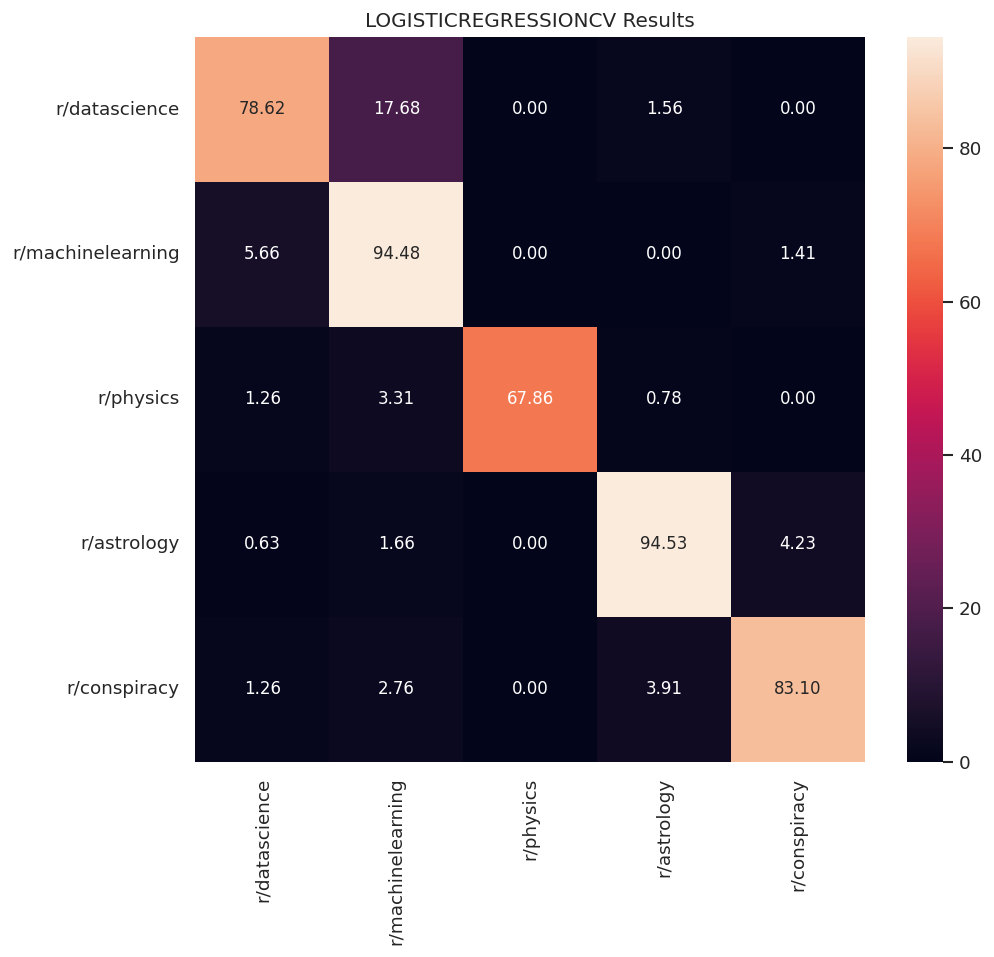

In [10]:
# Plot
reddit.plot_confusion(y_test)

In [11]:
# Predict
X = ["One of the most common uses for Python is in its ability to create and manage data structures quickly ", "Naive Bayes and Gradient Descent", "Scorpio and Pisces"]
yp = reddit.predict(X)

In [13]:
# Only Logistic Regression (the best model)
df = pd.DataFrame(yp[2][1])

# Fix result
lab_num = [(int(np.unique(classification[item][1])), item) for item in classification.keys()]

for item in lab_num:
    df.loc[df["predictions"] == item[0], "predictions"] = item[1] 

print(df)

                  model                                              input  \
0  LogisticRegressionCV  One of the most common uses for Python is in i...   
1  LogisticRegressionCV                   Naive Bayes and Gradient Descent   
2  LogisticRegressionCV                                 Scorpio and Pisces   

       predictions  
0      datascience  
1  machinelearning  
2        astrology  
